In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from datetime import datetime
import yfinance as yf

In [ ]:
#Read Toyota data
data_TM = pd.read_csv('/content/TM.csv')
data_TM

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,67.389999,67.900002,67.309998,67.779999,59.586105,377100
1,2012-01-04,68.230003,68.680000,68.070000,68.430000,60.157532,501600
2,2012-01-05,68.500000,68.830002,68.370003,68.620003,60.324562,343700
3,2012-01-06,68.519997,68.599998,68.220001,68.510002,60.227848,212000
4,2012-01-09,68.500000,68.709999,68.220001,68.419998,60.148735,301700
...,...,...,...,...,...,...,...
2997,2023-11-30,189.529999,190.000000,189.130005,189.779999,189.779999,189400
2998,2023-12-01,190.770004,192.809998,190.369995,192.740005,192.740005,237500
2999,2023-12-04,188.339996,189.110001,187.050003,187.369995,187.369995,331200
3000,2023-12-05,187.699997,188.979996,187.500000,187.990005,187.990005,199600


In [ ]:
train_size = int(0.7 * len(data_TM))
test_size = int(0.2 * len(data_TM))
val_size = len(data_TM) - train_size - test_size

train_data = data_TM[:train_size]
test_data = data_TM[train_size:train_size+test_size]
val_data = data_TM[train_size+test_size:]

In [ ]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

#Create linear regression model
model = LinearRegression()

# Fit the model
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(x_test)
# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_val_pred = model.predict(x_val)

In [ ]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  data_TM.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[149.63059377 149.64762874 149.66466371 149.68169868 149.69873365
 149.71576862 149.7328036  149.74983857 149.76687354 149.78390851
 149.80094348 149.81797845 149.83501343 149.8520484  149.86908337
 149.88611834 149.90315331 149.92018828 149.93722325 149.95425823
 149.9712932  149.98832817 150.00536314 150.02239811 150.03943308
 150.05646805 150.07350303 150.090538   150.10757297 150.12460794]


In [ ]:
# Function to calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
x

Testing MAE: 22.21598831991198
Testing RMSE: 27.400814866667158
Testing MAPE: 0.1583757684821297
---------------------------
Validation MAE: 14.165565212580555
Validation RMSE: 3.763716941081058
Validation MAPE: 0.09569395329550459


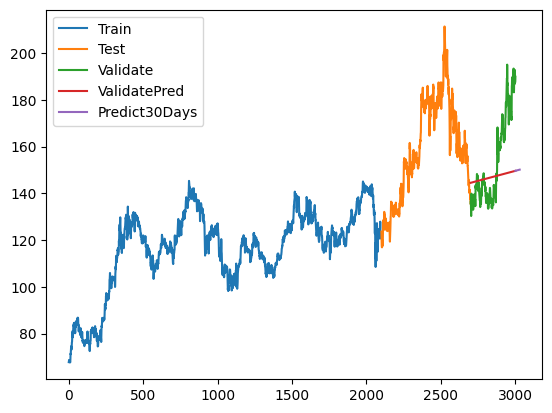

In [ ]:
# Vẽ hình
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(val_data.index, val_data['Close'])
plt.plot(val_data.index, y_val_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Validate','ValidatePred','Predict30Days'])
plt.show()